#  Assignment 1
## AML-2304 - Natural Language Processing 

- Abhijit Morye 	- ID C0825094
- Bruno Milhomem 	- ID C0796309
- Sara Sayyadi 	    - ID C0810229
- Tashi Paljor 	    - ID C0825364

### Amazon Customer Reviews Dataset

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import os

In [2]:
# Loading the dataset
file = 'https://raw.githubusercontent.com/joshivaibhav/AmazonCustomerReview/master/amazondata.csv'

df = pd.read_csv(file)
df.head()

/Users/farhadzare/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Helpful Votes (bin) Number of Records Star Rating (bin)  Customer Id  \
0                   0                 1               0.0          NaN   
1                 NaN                 1               NaN          NaN   
2                   0                 1               0.0          NaN   
3                   0                 1               0.0          NaN   
4                   0                 1               0.0          NaN   

   Helpful Votes  Overall Votes  Product Id  \
0            4.0           14.0    26009102   
1            NaN            NaN     7491727   
2            2.0            2.0  002782683X   
3            0.0            0.0    60187271   
4           14.0           20.0    60392452   

                                         Review Body      Review Year  \
0  You will love this book.  It is a hard long re...  03/17/2005 0:00   
1  This is the UK edition of Dr. Omit's book. Dr....              NaN   
2  This is a fun and entertaining book about lear...  06/25/2012 0:00   
3  Started a big slow, but once into it the autho...  06/09/2013 0:00   
4  Received this book as a Christmas present. I h...  08/05/2003 0:00   

                                     Review Headline  Star Rating  
0                                     Best Book Ever          5.0  
1  researchers from John Hopkins School of Medici...          NaN  
2                                           Michelle          5.0  
3                                     Loved the book          5.0  
4                        Challenges your assumptions          4.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128845 entries, 0 to 128844
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Helpful Votes (bin)  114947 non-null  object 
 1   Number of Records    128843 non-null  object 
 2   Star Rating (bin)    116311 non-null  object 
 3   Customer Id          59980 non-null   float64
 4   Helpful Votes        114943 non-null  float64
 5   Overall Votes        116121 non-null  float64
 6   Product Id           128840 non-null  object 
 7   Review Body          128834 non-null  object 
 8   Review Year          114933 non-null  object 
 9   Review Headline      128831 non-null  object 
 10  Star Rating          116305 non-null  float64
dtypes: float64(4), object(7)
memory usage: 10.8+ MB


In [4]:
df.describe()

Customer Id  Helpful Votes  Overall Votes    Star Rating
count  5.998000e+04  114943.000000  116121.000000  116305.000000
mean   2.690718e+07       2.326936       3.374609       4.381351
std    1.632404e+07      18.244605      19.392622       6.252964
min    5.000000e+00       0.000000       0.000000       0.000000
25%    1.340297e+07       0.000000       0.000000       4.000000
50%    2.541390e+07       0.000000       0.000000       5.000000
75%    4.227803e+07       1.000000       2.000000       5.000000
max    5.309540e+07    1996.000000    2008.000000    2008.000000

In [4]:
# shape and data types of the data
print(df.shape)

print('----'*10)

print(df.dtypes)

(128845, 11)
----------------------------------------
Helpful Votes (bin)     object
Number of Records       object
Star Rating (bin)       object
Customer Id            float64
Helpful Votes          float64
Overall Votes          float64
Product Id              object
Review Body             object
Review Year             object
Review Headline         object
Star Rating            float64
dtype: object


In [10]:
# Total reviews
print(len(df['Customer Id']))

128845


In [5]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])

numeric_cols = df_numeric.columns.values

print(numeric_cols)

['Customer Id' 'Helpful Votes' 'Overall Votes' 'Star Rating']


In [6]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])

non_numeric_cols = df_non_numeric.columns.values

print(non_numeric_cols)

['Helpful Votes (bin)' 'Number of Records' 'Star Rating (bin)'
 'Product Id' 'Review Body' 'Review Year' 'Review Headline']


In [7]:
# create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing

created missing indicator for: Helpful Votes (bin)
created missing indicator for: Number of Records
created missing indicator for: Star Rating (bin)
created missing indicator for: Customer Id
created missing indicator for: Helpful Votes
created missing indicator for: Overall Votes
created missing indicator for: Product Id
created missing indicator for: Review Body
created missing indicator for: Review Year
created missing indicator for: Review Headline
created missing indicator for: Star Rating


In [9]:
# Checking amount of null values
df.isnull().sum()/len(df)

Helpful Votes (bin)              0.107866
Number of Records                0.000016
Star Rating (bin)                0.097280
Customer Id                      0.534479
Helpful Votes                    0.107897
Overall Votes                    0.098754
Product Id                       0.000039
Review Body                      0.000085
Review Year                      0.107975
Review Headline                  0.000109
Star Rating                      0.097326
Helpful Votes (bin)_ismissing    0.000000
Number of Records_ismissing      0.000000
Star Rating (bin)_ismissing      0.000000
Customer Id_ismissing            0.000000
Helpful Votes_ismissing          0.000000
Overall Votes_ismissing          0.000000
Product Id_ismissing             0.000000
Review Body_ismissing            0.000000
Review Year_ismissing            0.000000
Review Headline_ismissing        0.000000
Star Rating_ismissing            0.000000
dtype: float64

In [10]:
# make everything lower case.
df['Review Body Lower'] = df['Review Body'].str.lower()
df['Review Body'].value_counts(dropna=False)

Great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [11]:
# Target column to do the sentiment analyses
df['Review Body'].describe()

count     128834
unique    121639
top        Great
freq         243
Name: Review Body, dtype: object

In [6]:
file = 'https://raw.githubusercontent.com/joshivaibhav/AmazonCustomerReview/master/amazondata.csv'

df1 = pd.read_csv(file, usecols=['Review Headline','Star Rating'])
df1.head()

Review Headline  Star Rating
0                                     Best Book Ever          5.0
1  researchers from John Hopkins School of Medici...          NaN
2                                           Michelle          5.0
3                                     Loved the book          5.0
4                        Challenges your assumptions          4.0

# Function to clean the data

In [7]:
# drop any rows w/ missing values
df1 = df1.dropna()
# discover the actual counts
df1.shape



(116298, 2)

In [24]:
df1['sentiment']=0
        

In [27]:
df1['sentiment'][df1['Star Rating'] >4] = 1

/var/folders/xw/ggml5mhd4n7315516lvx2p6c0000gn/T/ipykernel_63775/2061317912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sentiment'][df1['Star Rating'] >4] = 1


In [28]:
df1

Review Headline  Star Rating  sentiment
0                               Best Book Ever          5.0          1
2                                     Michelle          5.0          1
3                               Loved the book          5.0          1
4                  Challenges your assumptions          4.0          0
6                                  Reflections          5.0          1
...                                        ...          ...        ...
128838            Entertaining and Educational          4.0          0
128839  Interesting Analysis of the First Lady          4.0          0
128840                                  Heroic          4.0          0
128843                            So upsetting          2.0          0
128844          ultimately real and insightful          5.0          1

[116298 rows x 3 columns]

<AxesSubplot:xlabel='sentiment', ylabel='count'>

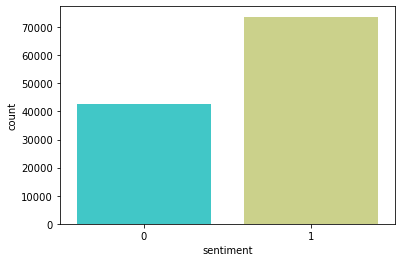

In [29]:
sns.countplot(x='sentiment',data=df1,palette='rainbow')

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
import string

In [41]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [37]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [42]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(df1['Review Headline'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

38360


In [43]:
review4 = df1['Review Headline'][3]
print(review4)

Loved the book


In [44]:
bow4 = bow_transformer.transform([review4])
print(bow4)
print(bow4.shape)

  (0, 11490)	1
  (0, 22809)	1
(1, 38360)


In [47]:
print(bow_transformer.get_feature_names()[11490])
print(bow_transformer.get_feature_names()[22809])

Loved
book


In [48]:
Review_bow = bow_transformer.transform(df1['Review Headline'])

In [49]:
print('Shape of Sparse Matrix: ', Review_bow.shape)
print('Amount of Non-Zero occurences: ', Review_bow.nnz)

Shape of Sparse Matrix:  (116298, 38360)
Amount of Non-Zero occurences:  360454


In [50]:
sparsity = (100.0 * Review_bow .nnz / (Review_bow .shape[0] * Review_bow .shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [51]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(Review_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 22809)	0.4706002883637836
  (0, 11490)	0.8823465127669081


In [53]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['great']])

3.2892520746196516
4.515763300095886


In [54]:
review_tfidf = tfidf_transformer.transform(Review_bow )
print(review_tfidf.shape)

(116298, 38360)


In [60]:
from sklearn.naive_bayes import MultinomialNB
detect_model = MultinomialNB().fit(review_tfidf, df1['sentiment'])

In [61]:
print('predicted:', detect_model.predict(tfidf4)[0])
print('expected:', df1['sentiment'][3])

predicted: 1
expected: 1


In [62]:
all_predictions = detect_model.predict(review_tfidf)
print(all_predictions)

[1 1 1 ... 1 1 1]


In [64]:
from sklearn.metrics import classification_report
print (classification_report(df1['sentiment'], all_predictions))

              precision    recall  f1-score   support

           0       0.87      0.63      0.73     42594
           1       0.82      0.95      0.88     73704

    accuracy                           0.83    116298
   macro avg       0.84      0.79      0.80    116298
weighted avg       0.84      0.83      0.82    116298



In [30]:
X = df1['Review Headline']
y = df1['sentiment']

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [32]:
X = cv.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split

In [66]:


rvw_train, rvw_test, sent_train, sent_test = \
train_test_split(df1['Review Headline'], df1['sentiment'], test_size=0.2)

print(len(rvw_train), len(rvw_test), len(rvw_train) + len(rvw_test))

93038 23260 116298


In [65]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [67]:
pipeline.fit(rvw_train,sent_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f9760b37ca0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [68]:
predictions = pipeline.predict(rvw_test)

In [69]:
print(classification_report(predictions,sent_test))

              precision    recall  f1-score   support

           0       0.50      0.76      0.60      5557
           1       0.91      0.76      0.83     17703

    accuracy                           0.76     23260
   macro avg       0.71      0.76      0.72     23260
weighted avg       0.81      0.76      0.78     23260

